In [1]:
import requests as rs
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re      

In [2]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\mycar.csv")

In [3]:
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,\nPeugeot 3008 1.2\n - Allure +\n,"Rs 850,000",Pre-Owned Individual,Petrol,"105,000km",NaN,\nRef: 54543\n,Dec 2017
1,\nHonda Civic 1.6 Sedan\n,"Rs 425,000",Pre-Owned Individual,Petrol,"116,200km",NaN,\nRef: 54588\n,Aug 2012
2,\nMercedes-Benz C-class 1.5 Sedan\n - C180 AMG...,"Rs 2,700,000",Pre-Owned Individual,Hybrid/Petrol,"4,622km","\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023
3,\nKIA Cerato 1.6 Sedan\n - SX\n,"Rs 290,000",Pre-Owned Individual,Petrol,"83,049km",NaN,\nRef: 54671\n,Dec 2011
4,\nBMW 3-series 2.0 Sedan\n - Sport\n,"Rs 1,275,000",Pre-Owned Individual,Petrol,"106,000km",NaN,\nRef: 54685\n,Nov 2014
...,...,...,...,...,...,...,...,...
1447,\nBMW 4-series 3.0 Coupe\n - 435i F32\n,"Rs 1,900,000",Local Pre-Owned dealer,Petrol,"61,093km",NaN,\nRef: 47580\n\n\n\n\n\n\n\n,Nov 2013
1448,\nSeat Ibiza 1.0\n - ref\n,"Rs 885,500",New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",\nRef: 10924\n\n\n\n\n\n\n\n,NaN
1449,\nPeugeot 3008 1.6\n,"Rs 1,200,000",Local Pre-Owned dealer,Diesel,"131,524km",NaN,\nRef: 47552\n\n\n\n\n\n\n\n,Apr 2018
1450,\nBMW X1 1.5\n - SDRIVE\n,"Rs 1,190,000",Local Pre-Owned dealer,Petrol,"58,000km",NaN,\nRef: 45101\n\n\n\n\n\n\n\n,Jun 2016


In [4]:
df.head()       

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,\nPeugeot 3008 1.2\n - Allure +\n,"Rs 850,000",Pre-Owned Individual,Petrol,"105,000km",NaN,\nRef: 54543\n,Dec 2017
1,\nHonda Civic 1.6 Sedan\n,"Rs 425,000",Pre-Owned Individual,Petrol,"116,200km",NaN,\nRef: 54588\n,Aug 2012
2,\nMercedes-Benz C-class 1.5 Sedan\n - C180 AMG...,"Rs 2,700,000",Pre-Owned Individual,Hybrid/Petrol,"4,622km","\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023
3,\nKIA Cerato 1.6 Sedan\n - SX\n,"Rs 290,000",Pre-Owned Individual,Petrol,"83,049km",NaN,\nRef: 54671\n,Dec 2011
4,\nBMW 3-series 2.0 Sedan\n - Sport\n,"Rs 1,275,000",Pre-Owned Individual,Petrol,"106,000km",NaN,\nRef: 54685\n,Nov 2014


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1452 non-null   object
 1   price          1452 non-null   object
 2   ower           1452 non-null   object
 3   hybrid_petrol  1452 non-null   object
 4   km             1152 non-null   object
 5   eml_month      794 non-null    object
 6   ref            1452 non-null   object
 7   date           1153 non-null   object
dtypes: object(8)
memory usage: 90.9+ KB


In [6]:
df.tail()

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
1447,\nBMW 4-series 3.0 Coupe\n - 435i F32\n,"Rs 1,900,000",Local Pre-Owned dealer,Petrol,"61,093km",NaN,\nRef: 47580\n\n\n\n\n\n\n\n,Nov 2013
1448,\nSeat Ibiza 1.0\n - ref\n,"Rs 885,500",New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",\nRef: 10924\n\n\n\n\n\n\n\n,NaN
1449,\nPeugeot 3008 1.6\n,"Rs 1,200,000",Local Pre-Owned dealer,Diesel,"131,524km",NaN,\nRef: 47552\n\n\n\n\n\n\n\n,Apr 2018
1450,\nBMW X1 1.5\n - SDRIVE\n,"Rs 1,190,000",Local Pre-Owned dealer,Petrol,"58,000km",NaN,\nRef: 45101\n\n\n\n\n\n\n\n,Jun 2016
1451,\nBMW 3-series 2.0 Sedan\n - 330i Sportline\n,"Rs 2,500,000",Local Pre-Owned dealer,Petrol,"31,625km","\n\nRs 42,346/month \n\n* As per condition\n",\nRef: 45856\n\n\n\n\n\n\n\n,Aug 2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1452 non-null   object
 1   price          1452 non-null   object
 2   ower           1452 non-null   object
 3   hybrid_petrol  1452 non-null   object
 4   km             1152 non-null   object
 5   eml_month      794 non-null    object
 6   ref            1452 non-null   object
 7   date           1153 non-null   object
dtypes: object(8)
memory usage: 90.9+ KB


In [8]:
df["car_name"]=df["car_name"].str.replace('\n','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,"Rs 850,000",Pre-Owned Individual,Petrol,"105,000km",NaN,\nRef: 54543\n,Dec 2017
1,Honda Civic 1.6 Sedan,"Rs 425,000",Pre-Owned Individual,Petrol,"116,200km",NaN,\nRef: 54588\n,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,"Rs 2,700,000",Pre-Owned Individual,Hybrid/Petrol,"4,622km","\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,"Rs 290,000",Pre-Owned Individual,Petrol,"83,049km",NaN,\nRef: 54671\n,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,"Rs 1,275,000",Pre-Owned Individual,Petrol,"106,000km",NaN,\nRef: 54685\n,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,"Rs 1,900,000",Local Pre-Owned dealer,Petrol,"61,093km",NaN,\nRef: 47580\n\n\n\n\n\n\n\n,Nov 2013
1448,Seat Ibiza 1.0 - ref,"Rs 885,500",New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",\nRef: 10924\n\n\n\n\n\n\n\n,NaN
1449,Peugeot 3008 1.6,"Rs 1,200,000",Local Pre-Owned dealer,Diesel,"131,524km",NaN,\nRef: 47552\n\n\n\n\n\n\n\n,Apr 2018
1450,BMW X1 1.5 - SDRIVE,"Rs 1,190,000",Local Pre-Owned dealer,Petrol,"58,000km",NaN,\nRef: 45101\n\n\n\n\n\n\n\n,Jun 2016


In [9]:
df["price"]=df["price"].str.replace('Rs','').str.replace(',','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,"105,000km",NaN,\nRef: 54543\n,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,"116,200km",NaN,\nRef: 54588\n,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,"4,622km","\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,"83,049km",NaN,\nRef: 54671\n,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,"106,000km",NaN,\nRef: 54685\n,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,"61,093km",NaN,\nRef: 47580\n\n\n\n\n\n\n\n,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",\nRef: 10924\n\n\n\n\n\n\n\n,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,"131,524km",NaN,\nRef: 47552\n\n\n\n\n\n\n\n,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,"58,000km",NaN,\nRef: 45101\n\n\n\n\n\n\n\n,Jun 2016


In [10]:
df["km"]=df["km"].str.replace('km','').str.replace(',','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,\nRef: 54543\n,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,\nRef: 54588\n,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,"\n\nRs 29,253/month \n\n* As per condition\n",\nRef: 54408\n,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,\nRef: 54671\n,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,\nRef: 54685\n,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,NaN,\nRef: 47580\n\n\n\n\n\n\n\n,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",\nRef: 10924\n\n\n\n\n\n\n\n,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,NaN,\nRef: 47552\n\n\n\n\n\n\n\n,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,NaN,\nRef: 45101\n\n\n\n\n\n\n\n,Jun 2016


In [11]:
df["ref"]=df["ref"].str.replace('\nRef:','').str.replace('\n','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,"\n\nRs 29,253/month \n\n* As per condition\n",54408,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,NaN,47580,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,"\n\nRs 9,362/month \n\n* As per condition\n",10924,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,NaN,47552,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,NaN,45101,Jun 2016


In [12]:
df["eml_month"]=df["eml_month"].str.replace('\n\nRs','').str.replace(',','').str.replace('\n\n','').str.replace('/month','').str.replace('*','').str.replace('As per condition','')
df

C:\Users\User\AppData\Local\Temp\ipykernel_18340\3960956344.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["eml_month"]=df["eml_month"].str.replace('\n\nRs','').str.replace(',','').str.replace('\n\n','').str.replace('/month','').str.replace('*','').str.replace('As per condition','')


,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253 \n,54408,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,NaN,47580,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,9362 \n,10924,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,NaN,47552,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,NaN,45101,Jun 2016


In [13]:
df["eml_month"]=df["eml_month"].str.replace('\n','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,NaN,47580,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,9362,10924,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,NaN,47552,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,NaN,45101,Jun 2016


In [15]:
df['eml_month'] = df['eml_month'].str.replace('for 84 months','')
df

,car_name,price,ower,hybrid_petrol,km,eml_month,ref,date
0,Peugeot 3008 1.2 - Allure +,850000,Pre-Owned Individual,Petrol,105000,NaN,54543,Dec 2017
1,Honda Civic 1.6 Sedan,425000,Pre-Owned Individual,Petrol,116200,NaN,54588,Aug 2012
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023
3,KIA Cerato 1.6 Sedan - SX,290000,Pre-Owned Individual,Petrol,83049,NaN,54671,Dec 2011
4,BMW 3-series 2.0 Sedan - Sport,1275000,Pre-Owned Individual,Petrol,106000,NaN,54685,Nov 2014
...,...,...,...,...,...,...,...,...
1447,BMW 4-series 3.0 Coupe - 435i F32,1900000,Local Pre-Owned dealer,Petrol,61093,NaN,47580,Nov 2013
1448,Seat Ibiza 1.0 - ref,885500,New,Petrol,NaN,9362,10924,NaN
1449,Peugeot 3008 1.6,1200000,Local Pre-Owned dealer,Diesel,131524,NaN,47552,Apr 2018
1450,BMW X1 1.5 - SDRIVE,1190000,Local Pre-Owned dealer,Petrol,58000,NaN,45101,Jun 2016


In [15]:
df.isnull().sum()

car_name           0
price              0
ower               0
hybrid_petrol      0
km               300
eml_month        658
ref                0
date             299
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df['eml_month'] = df['eml_month'].astype(int)

In [19]:
df[['ref', 'price']] = df[['ref', 'price']].astype(int)

df.dtypes

car_name         object
price             int32
ower             object
hybrid_petrol    object
km               object
eml_month         int32
ref               int32
date             object
dtype: object

In [21]:
df["car_name"].nunique()

351

In [22]:
df["car_name"].unique()

array(['Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULTRA HYBRID',
       'BMW M2 3.0 Coupe - A Competition Coupe M TwinPower Turbo',
       'Citroen C3 1.2 Hatchback', 'Infiniti QX80 5.6',
       'KIA Rio 1.2 Hatchback', 'BMW X4 2.0 - XDRIVE 20I',
       'Volkswagen Amarok 3.0 Pickup (4x4)', 'Honda Vezel 1.5',
       'BMW 2-series 1.5 Gran Coupe', 'Hyundai Accent 1.4 Sedan',
       'Hyundai Tucson 1.6', 'Skoda Octavia 1.4 Sedan',
       'BMW 8-series 4.4', 'Honda Civic 1.5 Sedan',
       'BMW iX3 Electric (210kW)', 'Audi A3 1.0 Hatchback',
       'KIA Cerato 1.6 Sedan', 'BMW X5 3.0 - Xdrive 45e',
       'Ford Ranger Raptor 2.0 Pickup (4x4)',
       'Mercedes-Benz C-class 1.5 Sedan', 'KIA Sportage 1.6',
       'Renault Sandero Stepway 1.6 SUV - 2020',
       'Ford Ranger Raptor 3.0 Pickup (4x4)',
       'Mitsubishi Motors Outlander PHEV 2.4', 'KIA EV6 Electric (125kW)',
       'Mercedes-Benz GLA-class 1.3 - AMG', 'Porsche 718 Cayman 2.0',
       'Ford Ranger 2.0 Pickup (4x4) - Raptor', 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 2 to 1451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       494 non-null    object
 1   price          494 non-null    int32 
 2   ower           494 non-null    object
 3   hybrid_petrol  494 non-null    object
 4   km             494 non-null    int32 
 5   eml_month      494 non-null    int32 
 6   ref            494 non-null    int32 
 7   date           494 non-null    object
dtypes: int32(4), object(4)
memory usage: 27.0+ KB


In [24]:
df[['km']] = df[['km']].astype(int)

df.dtypes

car_name         object
price             int32
ower             object
hybrid_petrol    object
km                int32
eml_month         int32
ref               int32
date             object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 2 to 1451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       494 non-null    object
 1   price          494 non-null    int32 
 2   ower           494 non-null    object
 3   hybrid_petrol  494 non-null    object
 4   km             494 non-null    int32 
 5   eml_month      494 non-null    int32 
 6   ref            494 non-null    int32 
 7   date           494 non-null    object
dtypes: int32(4), object(4)
memory usage: 27.0+ KB


In [27]:
df["ower"].nunique()

3

In [28]:
df["ower"].unique()

array(['Pre-Owned Individual', 'Local Pre-Owned dealer',
       'Imported / Recon dealer'], dtype=object)

In [29]:
df_renamed = df.rename(columns={'ower': 'owner', 'eml_month': 'emi_month'})
df_renamed.columns

Index(['car_name', 'price', 'owner', 'hybrid_petrol', 'km', 'emi_month', 'ref',
       'date'],
      dtype='object')

In [30]:
df_renamed.head()

,car_name,price,owner,hybrid_petrol,km,emi_month,ref,date
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023
7,BMW M2 3.0 Coupe - A Competition Coupe M TwinP...,4000000,Local Pre-Owned dealer,Petrol,14000,67753,54790,Jan 2020
11,Citroen C3 1.2 Hatchback,450000,Local Pre-Owned dealer,Petrol,123700,9777,54783,Dec 2018
13,Infiniti QX80 5.6,2950000,Local Pre-Owned dealer,Petrol,35000,49968,54780,Jan 2020
14,KIA Rio 1.2 Hatchback,535000,Local Pre-Owned dealer,Petrol,67200,11623,54779,Dec 2018


In [31]:
df_renamed["car_name"].value_counts()                                                 

Honda Vezel 1.5 - Z                                          9
Honda Vezel 1.5                                              8
Toyota RAV4 2.5 - G                                          6
Hyundai Tucson 1.6                                           6
Jaguar F-Pace 2.0                                            5
                                                            ..
Renault Kiger 1.0 - INTENS 1.0 CVTX                          1
Nissan Note 1.2 Hatchback - E Power XV Selection             1
Nissan Leaf Electric (80kW) - G                              1
BMW iX Electric (240kW) - xDrive40 Sport (Fully Electric)    1
BMW 3-series 2.0 Sedan - 330i Sportline                      1
Name: car_name, Length: 351, dtype: int64

In [32]:
df_renamed.car_name[:60]                         

2      Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...
7      BMW M2 3.0 Coupe - A Competition Coupe M TwinP...
11                              Citroen C3 1.2 Hatchback
13                                     Infiniti QX80 5.6
14                                 KIA Rio 1.2 Hatchback
16                               BMW X4 2.0 - XDRIVE 20I
19                    Volkswagen Amarok 3.0 Pickup (4x4)
22                                       Honda Vezel 1.5
23                           BMW 2-series 1.5 Gran Coupe
24                                       Honda Vezel 1.5
26                              Hyundai Accent 1.4 Sedan
27                                    Hyundai Tucson 1.6
33                               Skoda Octavia 1.4 Sedan
34                                      BMW 8-series 4.4
35                                 Honda Civic 1.5 Sedan
38                              BMW iX3 Electric (210kW)
39                                 Audi A3 1.0 Hatchback
42                             

In [33]:
df_renamed.isnull().sum()

car_name         0
price            0
owner            0
hybrid_petrol    0
km               0
emi_month        0
ref              0
date             0
dtype: int64

In [35]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       1153 non-null   object
 1   price          1153 non-null   int32 
 2   owner          1153 non-null   object
 3   hybrid_petrol  1153 non-null   object
 4   km             1153 non-null   int32 
 5   emi_month      1153 non-null   int32 
 6   ref            1153 non-null   int32 
 7   date           1153 non-null   object
dtypes: int32(4), object(4)
memory usage: 63.1+ KB


In [34]:
df_renamed.car_name.apply(lambda x : x.split())           

2       [Mercedes-Benz, C-class, 1.5, Sedan, -, C180, ...
7       [BMW, M2, 3.0, Coupe, -, A, Competition, Coupe...
11                          [Citroen, C3, 1.2, Hatchback]
13                                  [Infiniti, QX80, 5.6]
14                             [KIA, Rio, 1.2, Hatchback]
                              ...                        
1434                          [Lotus, Elise, 1.8, -, 220]
1435             [BMW, 7-series, 2.0, -, 740LE, X, Drive]
1442            [Mitsubishi, Motors, Eclipse, Cross, 1.5]
1445                            [Volkswagen, Tiguan, 1.4]
1451      [BMW, 3-series, 2.0, Sedan, -, 330i, Sportline]
Name: car_name, Length: 494, dtype: object

In [35]:
df_renamed.car_name.apply(lambda x : x.split()[0])

2       Mercedes-Benz
7                 BMW
11            Citroen
13           Infiniti
14                KIA
            ...      
1434            Lotus
1435              BMW
1442       Mitsubishi
1445       Volkswagen
1451              BMW
Name: car_name, Length: 494, dtype: object

In [36]:
df_renamed['car_company'] = df.car_name.apply(lambda x : x.split()[0])

In [37]:
df_renamed.car_company.value_counts()

Toyota           124
BMW               77
Honda             56
Nissan            34
Mercedes-Benz     30
Hyundai           17
Renault           15
Jaguar            14
Land              13
Peugeot           12
Audi              12
KIA               11
Ford              10
MINI              10
Porsche            8
Suzuki             7
Volvo              7
Citroen            5
Mazda              5
Seat               3
Volkswagen         3
Infiniti           3
Mitsubishi         3
Skoda              3
Datsun             2
Alfa               2
Lexus              2
Proton             2
Jeep               1
MG                 1
GWM                1
Lotus              1
Name: car_company, dtype: int64

In [38]:
df_renamed.columns

Index(['car_name', 'price', 'owner', 'hybrid_petrol', 'km', 'emi_month', 'ref',
       'date', 'car_company'],
      dtype='object')

In [39]:
df_renamed.head()

,car_name,price,owner,hybrid_petrol,km,emi_month,ref,date,car_company
2,Mercedes-Benz C-class 1.5 Sedan - C180 AMG ULT...,2700000,Pre-Owned Individual,Hybrid/Petrol,4622,29253,54408,Jul 2023,Mercedes-Benz
7,BMW M2 3.0 Coupe - A Competition Coupe M TwinP...,4000000,Local Pre-Owned dealer,Petrol,14000,67753,54790,Jan 2020,BMW
11,Citroen C3 1.2 Hatchback,450000,Local Pre-Owned dealer,Petrol,123700,9777,54783,Dec 2018,Citroen
13,Infiniti QX80 5.6,2950000,Local Pre-Owned dealer,Petrol,35000,49968,54780,Jan 2020,Infiniti
14,KIA Rio 1.2 Hatchback,535000,Local Pre-Owned dealer,Petrol,67200,11623,54779,Dec 2018,KIA


In [40]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 2 to 1451
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       494 non-null    object
 1   price          494 non-null    int32 
 2   owner          494 non-null    object
 3   hybrid_petrol  494 non-null    object
 4   km             494 non-null    int32 
 5   emi_month      494 non-null    int32 
 6   ref            494 non-null    int32 
 7   date           494 non-null    object
 8   car_company    494 non-null    object
dtypes: int32(4), object(5)
memory usage: 30.9+ KB


## Univariate Analysis

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

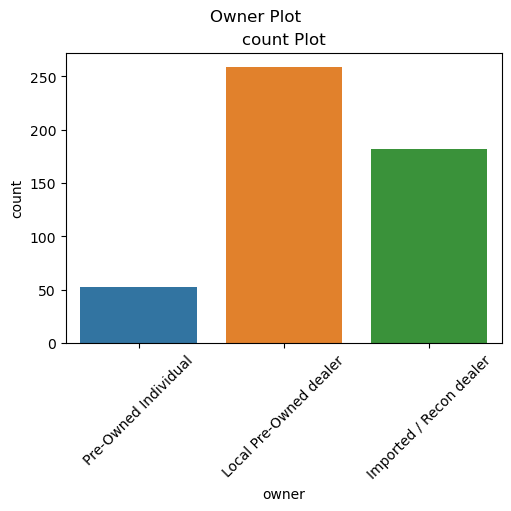

In [42]:
fig, axes = plt.subplots( figsize=(5,5), constrained_layout=True)
fig.suptitle("Owner Plot")
    
axes.set_title("count Plot")
sns.countplot(df_renamed,x='owner', ax=axes)
plt.xticks(rotation=45)
plt.show()

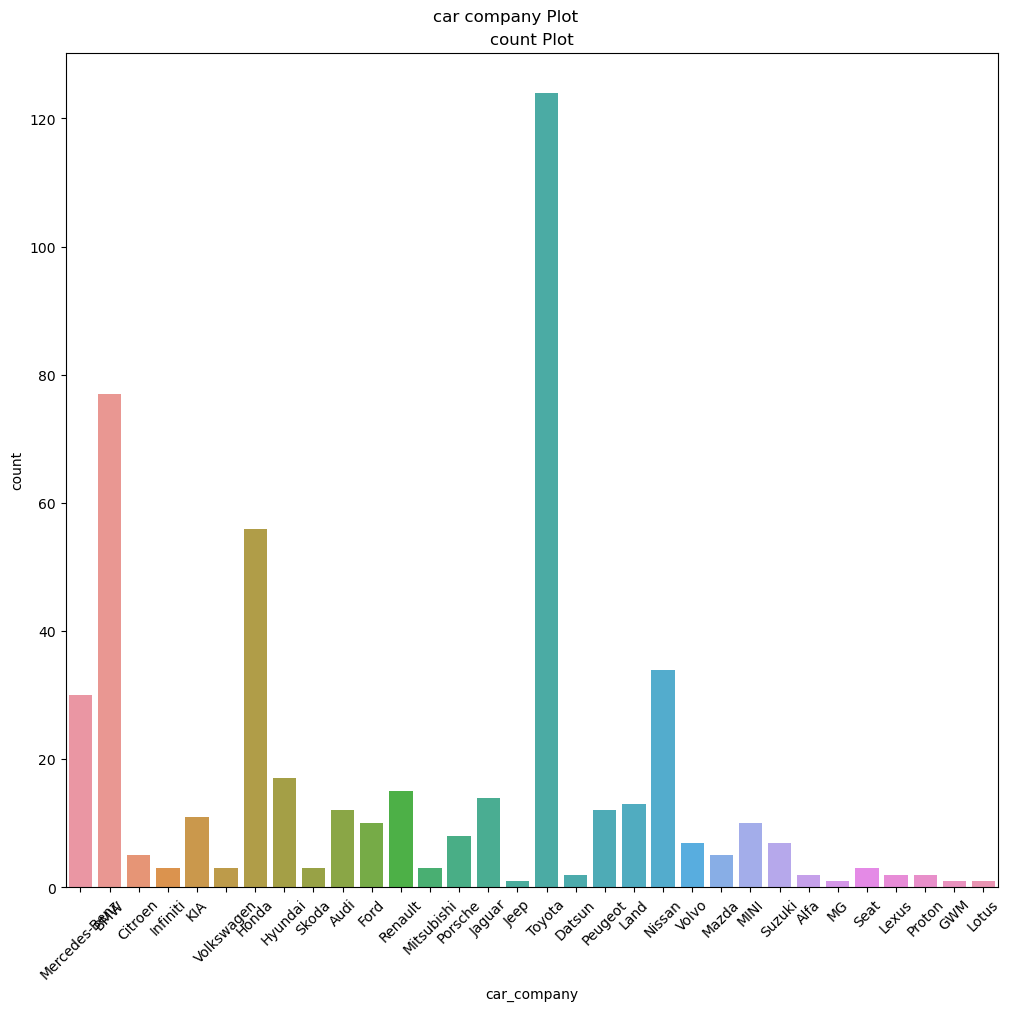

In [43]:
fig, axes = plt.subplots( figsize=(10,10), constrained_layout=True)
fig.suptitle("car company Plot")
    
axes.set_title("count Plot")
sns.countplot(df_renamed,x='car_company', ax=axes)
plt.xticks(rotation=45)
plt.show()

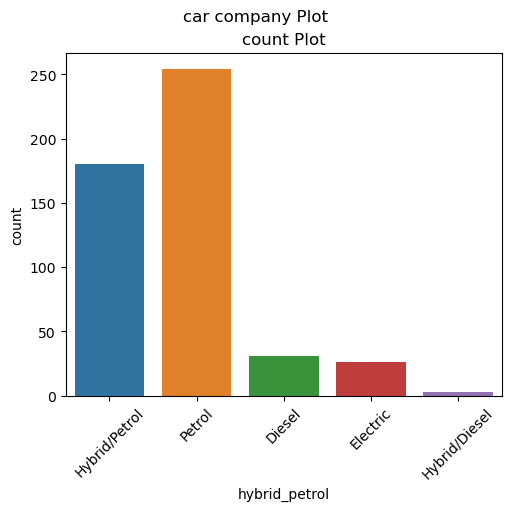

In [44]:
fig, axes = plt.subplots( figsize=(5,5), constrained_layout=True)
fig.suptitle("car company Plot")
    
axes.set_title("count Plot")
sns.countplot(df_renamed,x='hybrid_petrol', ax=axes)
plt.xticks(rotation=45)
plt.show()

In [45]:
numerical_df = df_renamed.select_dtypes(include=['int32'])

In [46]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [47]:
numerical_univariate_analysis(numerical_df)

********** price **********
min       3.150000e+05
max       9.550000e+06
mean      1.821755e+06
median    1.377500e+06
std       1.288942e+06
Name: price, dtype: float64

********** km **********
min           38.000000
max       165000.000000
mean       37011.394737
median     31000.000000
std        26047.166111
Name: km, dtype: float64

********** emi_month **********
min         5177.000000
max       121556.000000
mean       30100.056680
median     21850.000000
std        21465.350254
Name: emi_month, dtype: float64

********** ref **********
min       44927.000000
max       54790.000000
mean      52822.471660
median    53558.500000
std        1986.584961
Name: ref, dtype: float64



In [48]:
discrete_df = df_renamed.select_dtypes(include=['object'])

In [49]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [50]:
discrete_univariate_analysis(discrete_df)

********** car_name **********
count                                                    494
nunique                                                  351
unique     [Mercedes-Benz C-class 1.5 Sedan - C180 AMG UL...
Name: car_name, dtype: object
Value Counts: 
 Honda Vezel 1.5 - Z                                          9
Honda Vezel 1.5                                              8
Toyota RAV4 2.5 - G                                          6
Hyundai Tucson 1.6                                           6
Jaguar F-Pace 2.0                                            5
                                                            ..
Renault Kiger 1.0 - INTENS 1.0 CVTX                          1
Nissan Note 1.2 Hatchback - E Power XV Selection             1
Nissan Leaf Electric (80kW) - G                              1
BMW iX Electric (240kW) - xDrive40 Sport (Fully Electric)    1
BMW 3-series 2.0 Sedan - 330i Sportline                      1
Name: car_name, Length: 351, dtype: int64

****

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

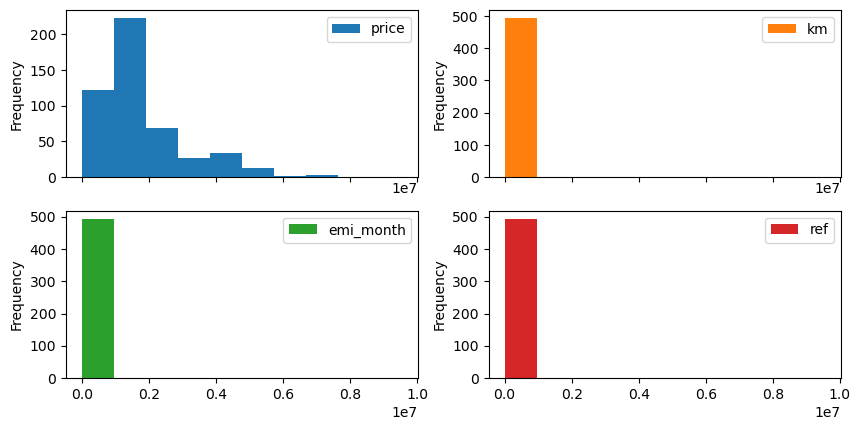

In [51]:
df_renamed.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

price           Axes(0.125,0.712609;0.352273x0.167391)
km           Axes(0.547727,0.712609;0.352273x0.167391)
emi_month       Axes(0.125,0.511739;0.352273x0.167391)
ref          Axes(0.547727,0.511739;0.352273x0.167391)
dtype: object

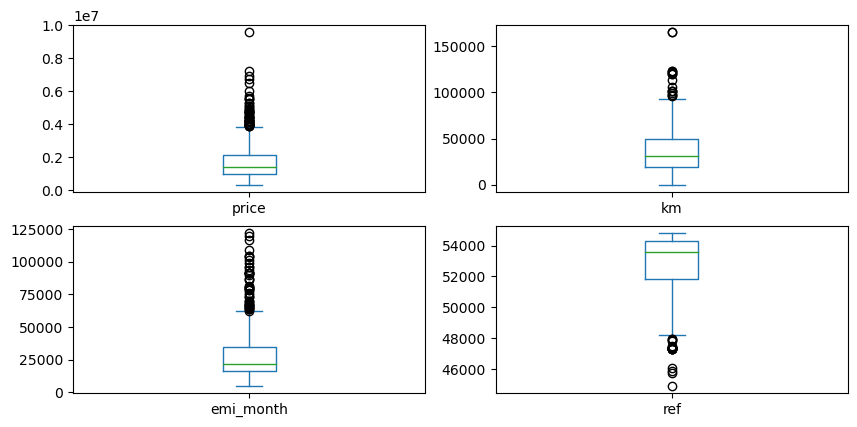

In [52]:
df_renamed.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

<Axes: xlabel='price', ylabel='Density'>

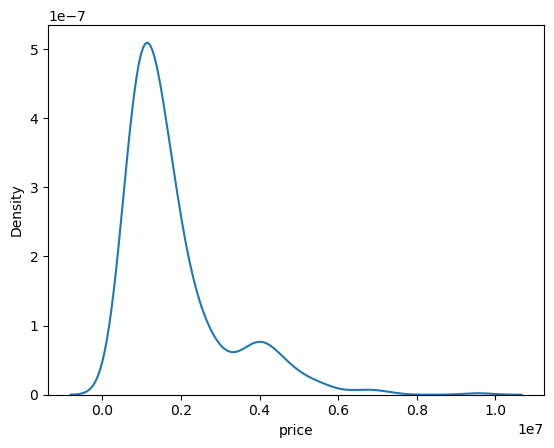

In [53]:
sns.kdeplot(data=df_renamed, x="price")

<Axes: xlabel='price'>

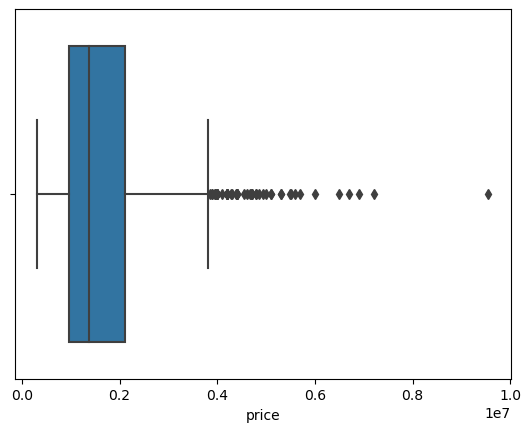

In [54]:
sns.boxplot(data=df_renamed, x="price")

## Bivariate Analysis

<Axes: xlabel='price', ylabel='km'>

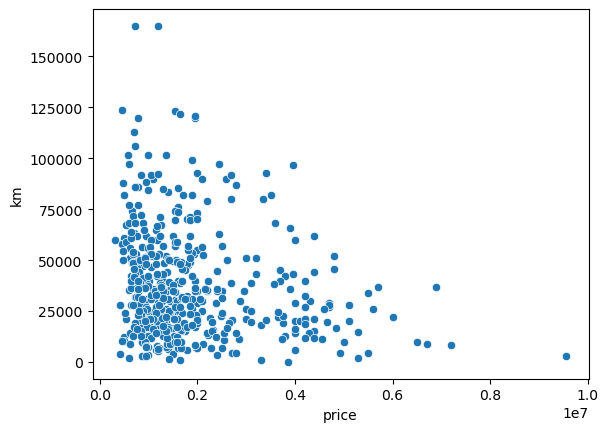

In [55]:
sns.scatterplot(data=df_renamed, x='price', y='km')

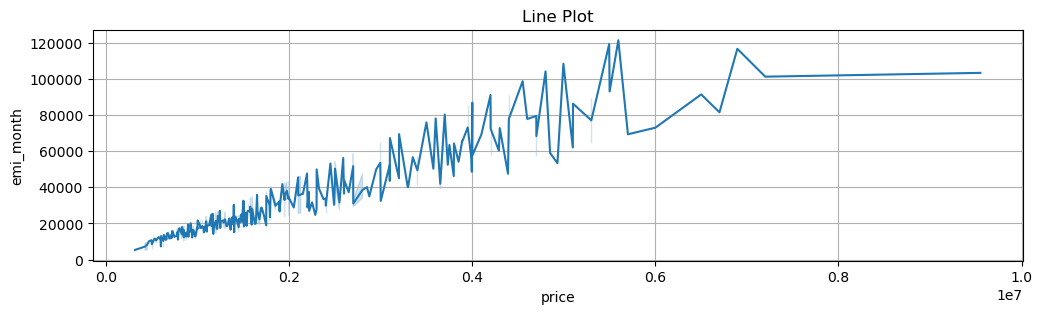

In [56]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df_renamed, x='price', y='emi_month', ax=ax)

plt.grid(True)

plt.show()

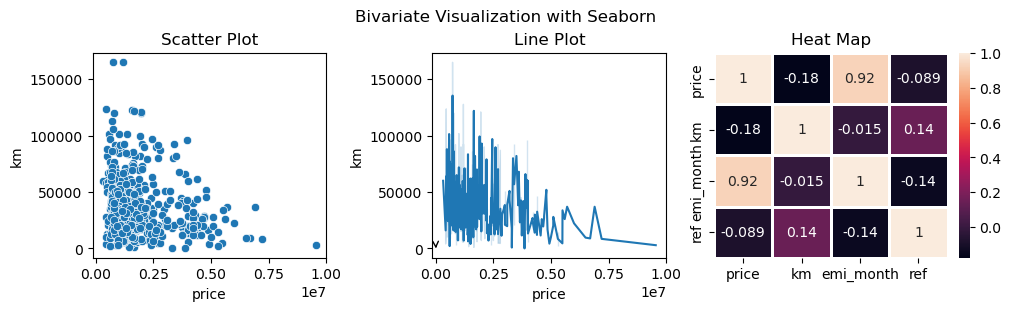

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df_renamed, x='price', y='km', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df_renamed, x='price', y='km', ax=axs[1])
axs[1].annotate(" ", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df_renamed.select_dtypes(include=['int32']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

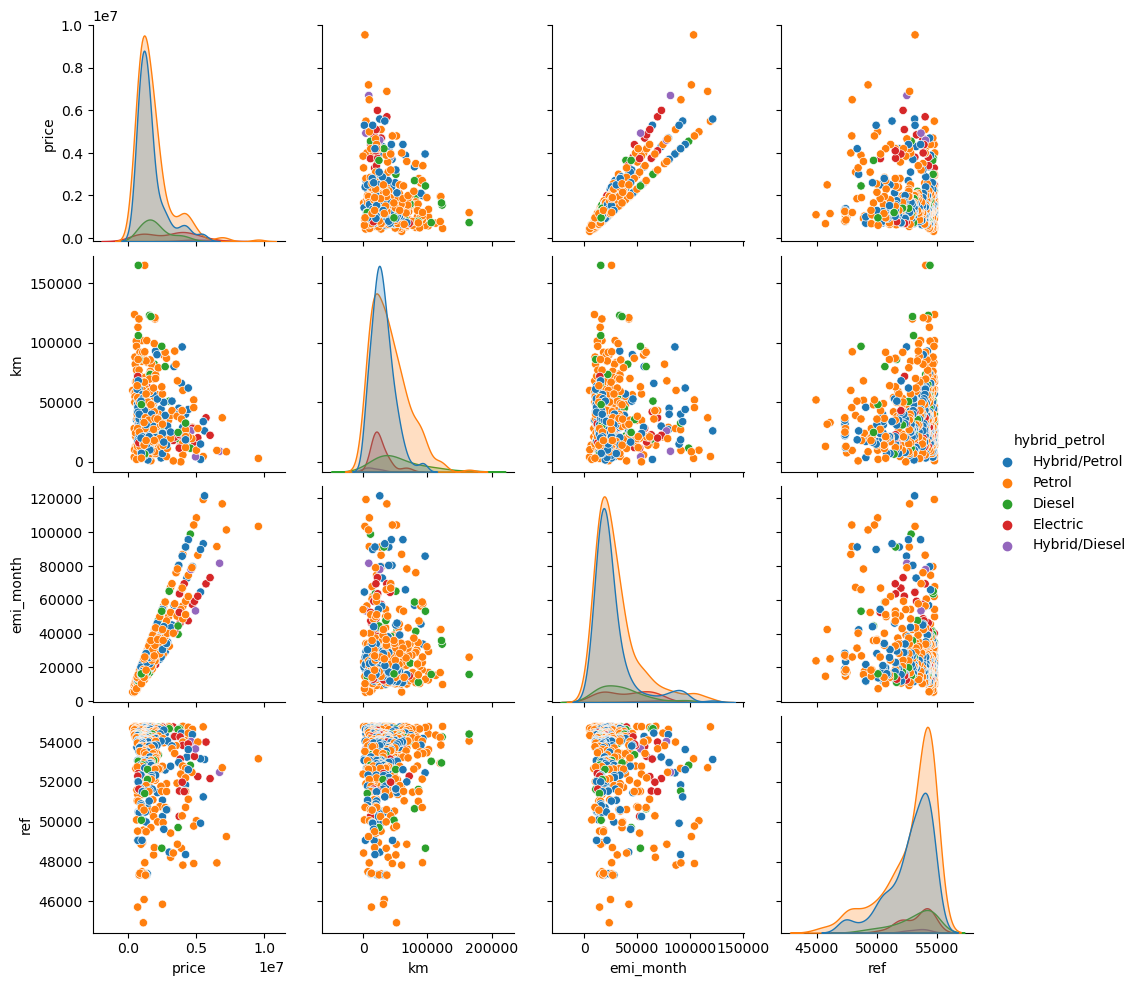

In [58]:
sns.pairplot(df_renamed,hue="hybrid_petrol")

<Axes: xlabel='car_company'>

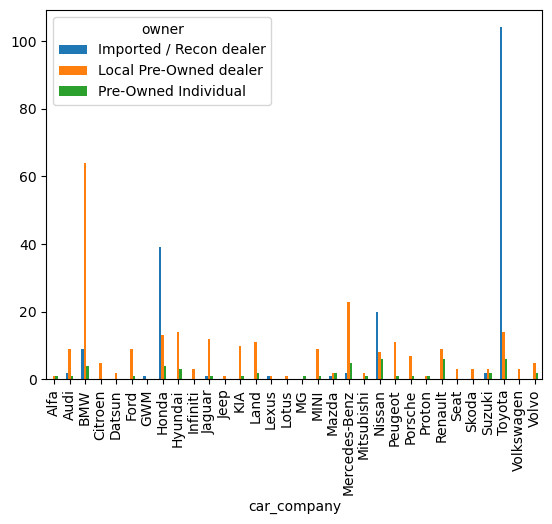

In [59]:
cross_tab=pd.crosstab(df_renamed["car_company"],df_renamed["owner"])
cross_tab.plot(kind="bar")

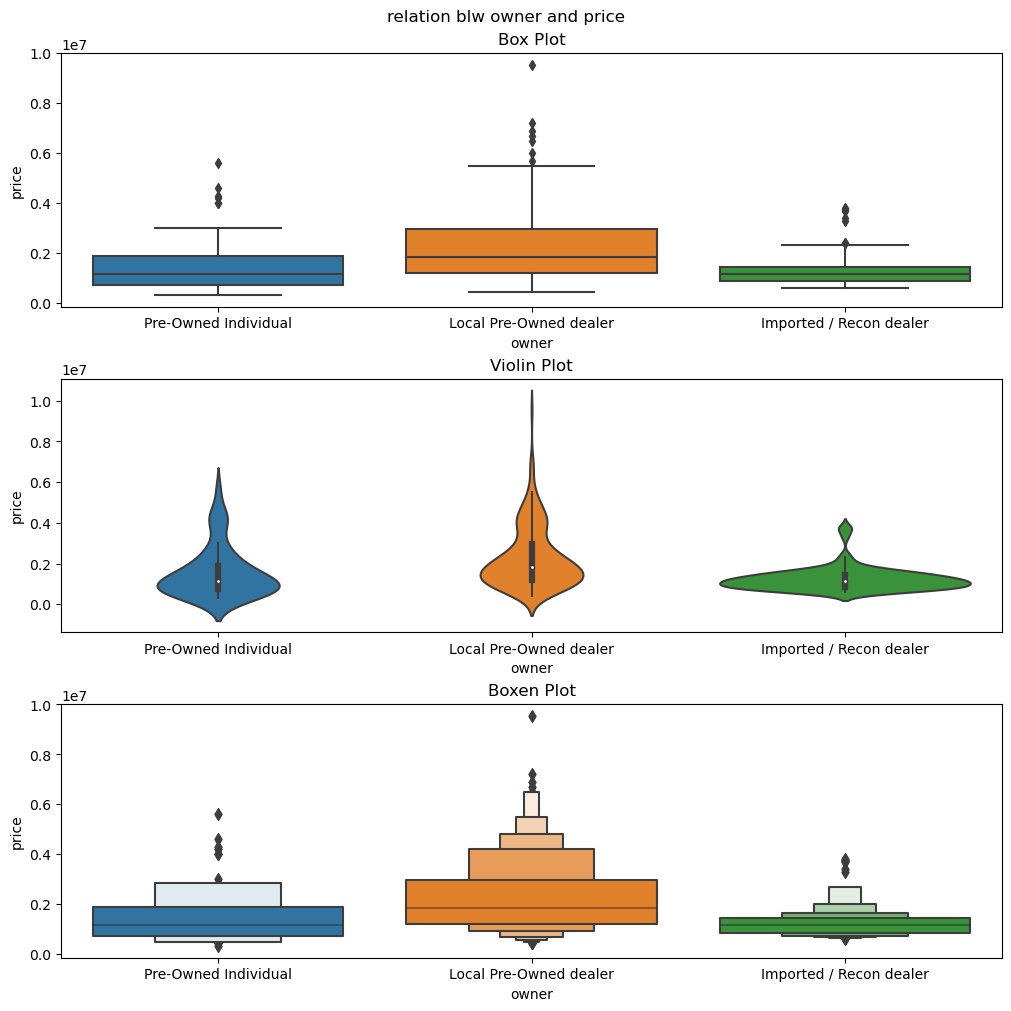

In [60]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), constrained_layout=True)
fig.suptitle("relation blw owner and price")

axs[0].set_title("Box Plot")
sns.boxplot(data=df_renamed, x='owner', y='price', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df_renamed, x='owner', y='price', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df_renamed, x='owner', y='price', ax=axs[2])

plt.show()

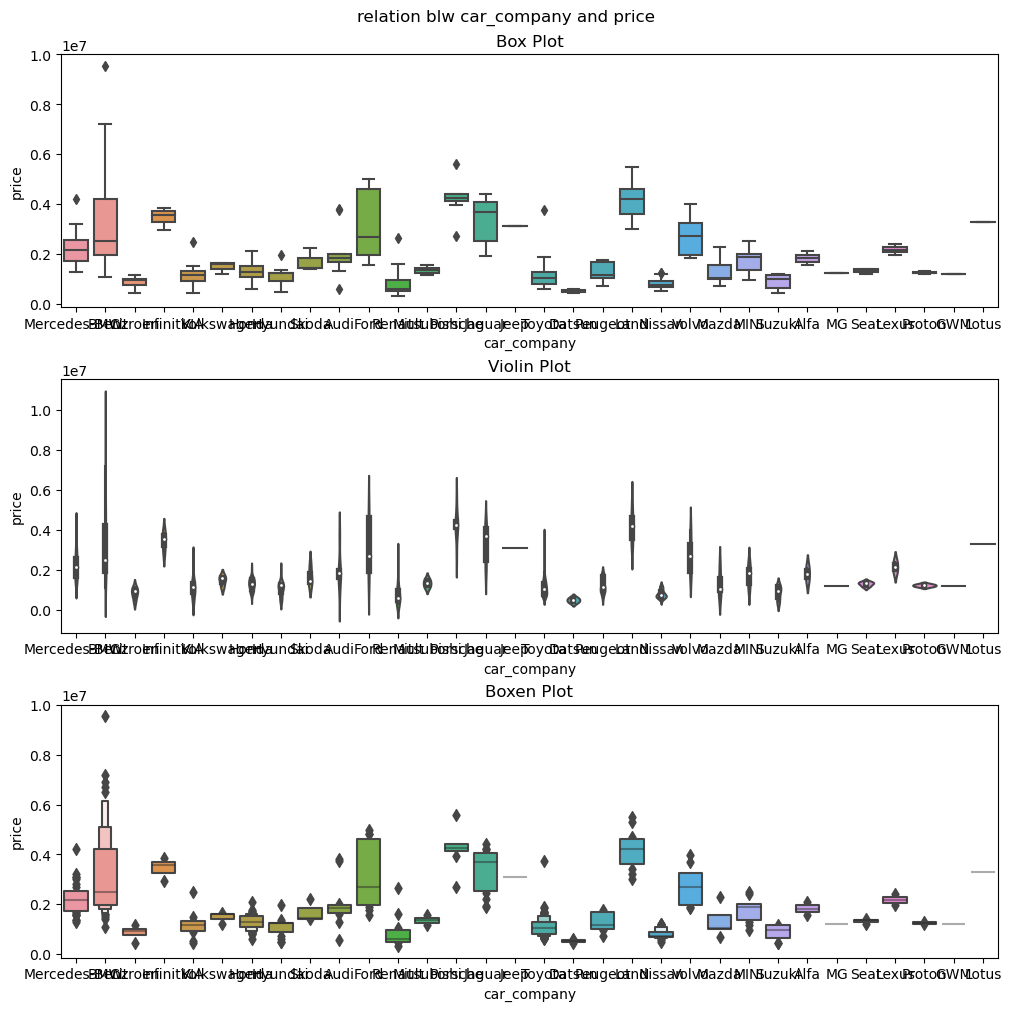

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), constrained_layout=True)
fig.suptitle("relation blw car_company and price")

axs[0].set_title("Box Plot")
sns.boxplot(data=df_renamed, x='car_company', y='price', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df_renamed, x='car_company', y='price', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df_renamed, x='car_company', y='price', ax=axs[2])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


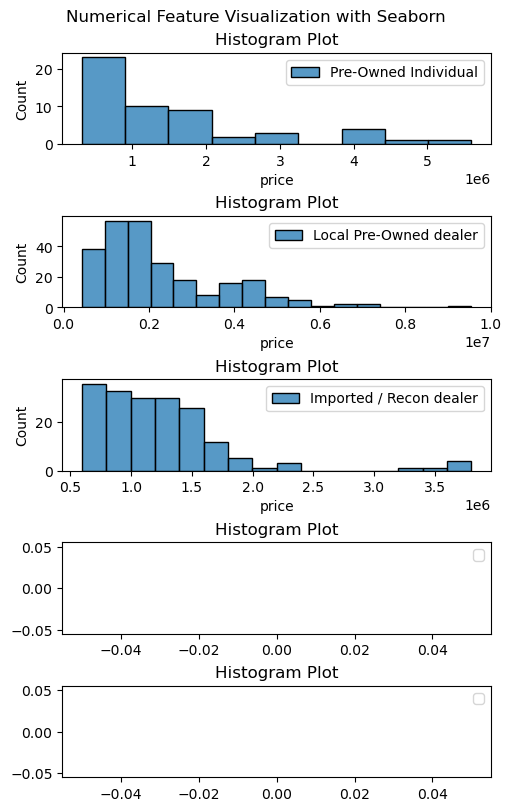

In [62]:
fig, axs = plt.subplots(5, 1, figsize=(5, 8), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df_renamed.loc[df_renamed['owner']=='Pre-Owned Individual'], x='price', ax=axs[0], label="Pre-Owned Individual")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df_renamed.loc[df_renamed['owner']=='Local Pre-Owned dealer'], x='price', ax=axs[1], label="Local Pre-Owned dealer")
axs[1].legend()
axs[2].set_title("Histogram Plot")
sns.histplot(data=df_renamed.loc[df_renamed['owner']=='Imported / Recon dealer'], x='price', ax=axs[2], label="Imported / Recon dealer")
axs[2].legend()
axs[3].set_title("Histogram Plot")
sns.histplot(data=df_renamed.loc[df_renamed['owner']=='New'], x='price', ax=axs[3], label="New")
axs[3].legend()
axs[4].set_title("Histogram Plot")
sns.histplot(data=df_renamed.loc[df_renamed['owner']=='Pre-Owned Corporate'], x='price', ax=axs[4], label="Pre-Owned Corporate")
axs[4].legend()
plt.show()